In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-parquet/test_data.parquet
/kaggle/input/amex-parquet/train_data.parquet


In [6]:
df_train = pd.read_parquet('/kaggle/input/amex-parquet/train_data.parquet')
df_test = pd.read_parquet('/kaggle/input/amex-parquet/test_data.parquet')
train=df_train.copy()
test=df_test.copy()

In [7]:
df_train.shape, df_test.shape

((5531451, 191), (11363762, 190))

In [8]:
df_train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,5485466.0,0.656334,0.244649,-4.589548e-01,0.480331,0.694295,0.864816,1.010000
D_39,5531451.0,0.153117,0.270071,5.026190e-09,0.004528,0.009057,0.236641,5.389619
B_1,5531451.0,0.124010,0.211987,-7.588799e+00,0.008864,0.031330,0.125902,1.324060
B_2,5529435.0,0.621489,0.401488,9.192280e-09,0.105331,0.814333,1.002403,1.010000
R_1,5531451.0,0.078803,0.226397,1.534223e-09,0.002896,0.005782,0.008661,3.256284
...,...,...,...,...,...,...,...,...
D_142,944408.0,0.390799,0.236182,-1.453934e-02,0.199399,0.382136,0.559307,2.229368
D_143,5429903.0,0.178802,0.378950,5.549692e-09,0.003028,0.006053,0.009076,1.010000
D_144,5490724.0,0.052390,0.182514,2.500991e-09,0.002753,0.005508,0.008260,1.343331
D_145,5429903.0,0.062335,0.193494,1.226024e-09,0.003028,0.006053,0.009081,4.827630


In [10]:
df_train.isnull().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_142          4587043
D_143           101548
D_144            40727
D_145           101548
target               0
Length: 191, dtype: int64

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(60)

,Total,Percent
D_87,5527586,0.999301
D_88,5525447,0.998915
D_108,5502513,0.994768
D_110,5500117,0.994335
D_111,5500117,0.994335
B_39,5497819,0.993920
D_73,5475595,0.989902
B_42,5459973,0.987078
D_134,5336752,0.964801
D_135,5336752,0.964801


In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os

In [13]:
null_columns=df_train.columns[df_train.isnull().any()]

In [14]:
df_train.drop(columns=null_columns, inplace=True)

In [15]:
df_test.drop(columns=null_columns, inplace=True)

In [16]:
df_train.isnull().sum()

customer_ID    0
S_2            0
D_39           0
B_1            0
R_1            0
              ..
D_96           0
B_36           0
D_127          0
R_28           0
target         0
Length: 69, dtype: int64

In [17]:
df_train.drop(columns=['customer_ID'], inplace=True)

In [18]:
categorical = df_train.select_dtypes(include = "object").columns
for i in range(0, len(categorical)):
    print(df_train[categorical[i]].value_counts())
    print('****************************************\n')

2018-02-17    26715
2018-01-20    25016
2018-02-03    23966
2018-03-17    23373
2018-02-24    23356
              ...  
2017-05-07     7895
2017-03-05     7879
2017-03-12     7797
2017-03-19     7788
2017-04-16     6990
Name: S_2, Length: 396, dtype: int64
****************************************

CO    4119621
CR     930133
CL     438390
XZ      25786
XM      10556
XL       6965
Name: D_63, dtype: int64
****************************************



In [19]:
df_train.drop(columns=['S_2'], inplace=True)

In [20]:
df_test.drop(columns=['S_2'], inplace=True)

In [21]:
D_63 = {'CO':0, 'CR':1, 'CL':2, 'XZ':3, 'XM':4, 'XL':5}
df_train['D_63'].replace(D_63, inplace=True)
df_test['D_63'].replace(D_63, inplace=True)

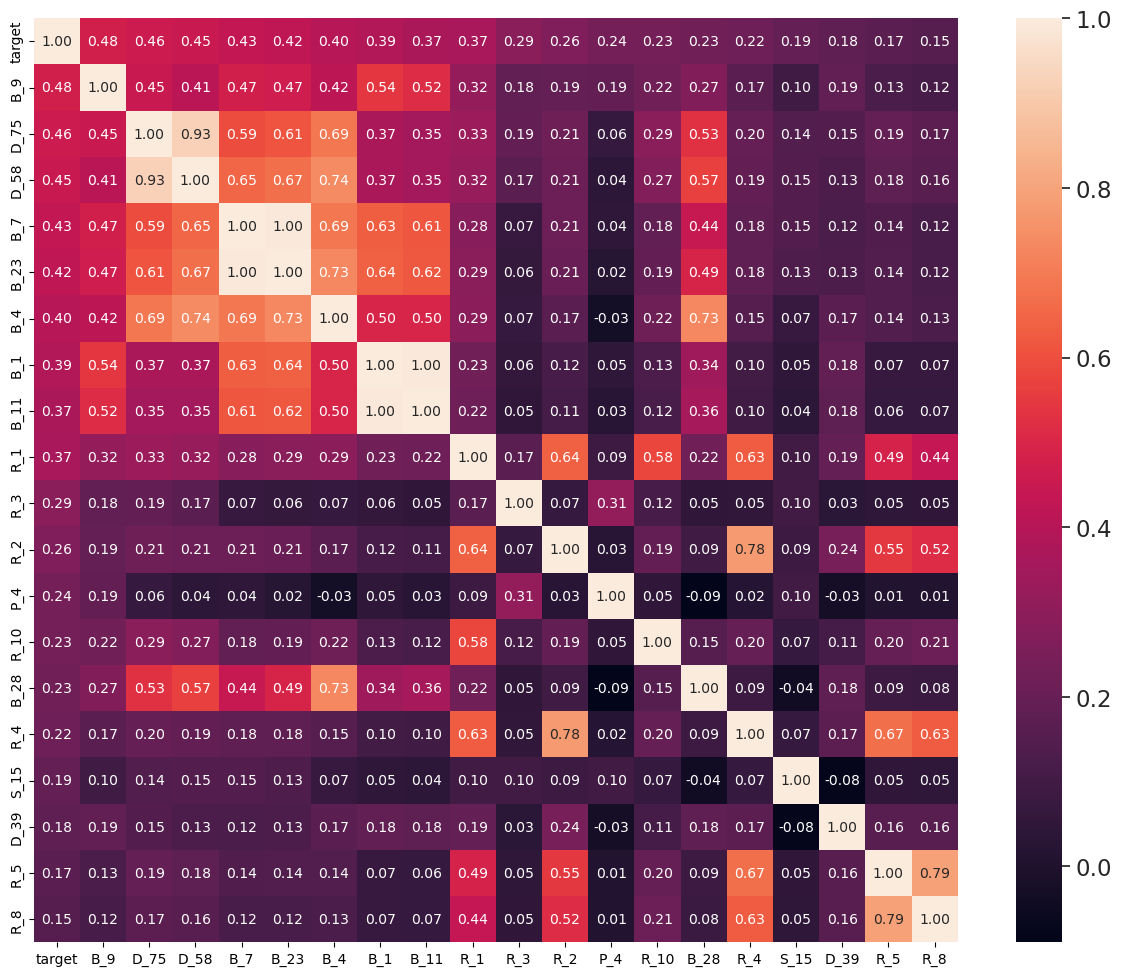

In [22]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
cols = corrmat.nlargest(20, 'target')['target'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<Axes: xlabel='target', ylabel='count'>

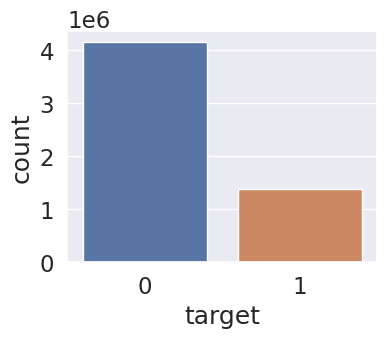

In [23]:
plt.figure(figsize=(4,3))
sns.countplot(x=df_train['target'])

In [24]:
df_train.columns

Index(['D_39', 'B_1', 'R_1', 'B_4', 'B_5', 'R_2', 'D_47', 'B_7', 'D_51', 'B_9',
       'R_3', 'B_10', 'S_5', 'B_11', 'S_6', 'R_4', 'B_12', 'S_8', 'R_5',
       'D_58', 'B_14', 'D_60', 'S_11', 'D_63', 'D_65', 'B_18', 'S_12', 'R_6',
       'S_13', 'B_21', 'D_71', 'S_15', 'B_23', 'P_4', 'D_75', 'B_24', 'R_8',
       'S_16', 'R_10', 'R_11', 'S_17', 'B_28', 'R_13', 'R_15', 'R_16', 'S_18',
       'D_86', 'R_17', 'R_18', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_21',
       'R_22', 'R_23', 'D_92', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'B_36',
       'D_127', 'R_28', 'target'],
      dtype='object')

In [25]:
cols = cols[1:]
cols

Index(['B_9', 'D_75', 'D_58', 'B_7', 'B_23', 'B_4', 'B_1', 'B_11', 'R_1',
       'R_3', 'R_2', 'P_4', 'R_10', 'B_28', 'R_4', 'S_15', 'D_39', 'R_5',
       'R_8'],
      dtype='object')

Text(0.5, 0.98, 'Relation between target and 9 important features')

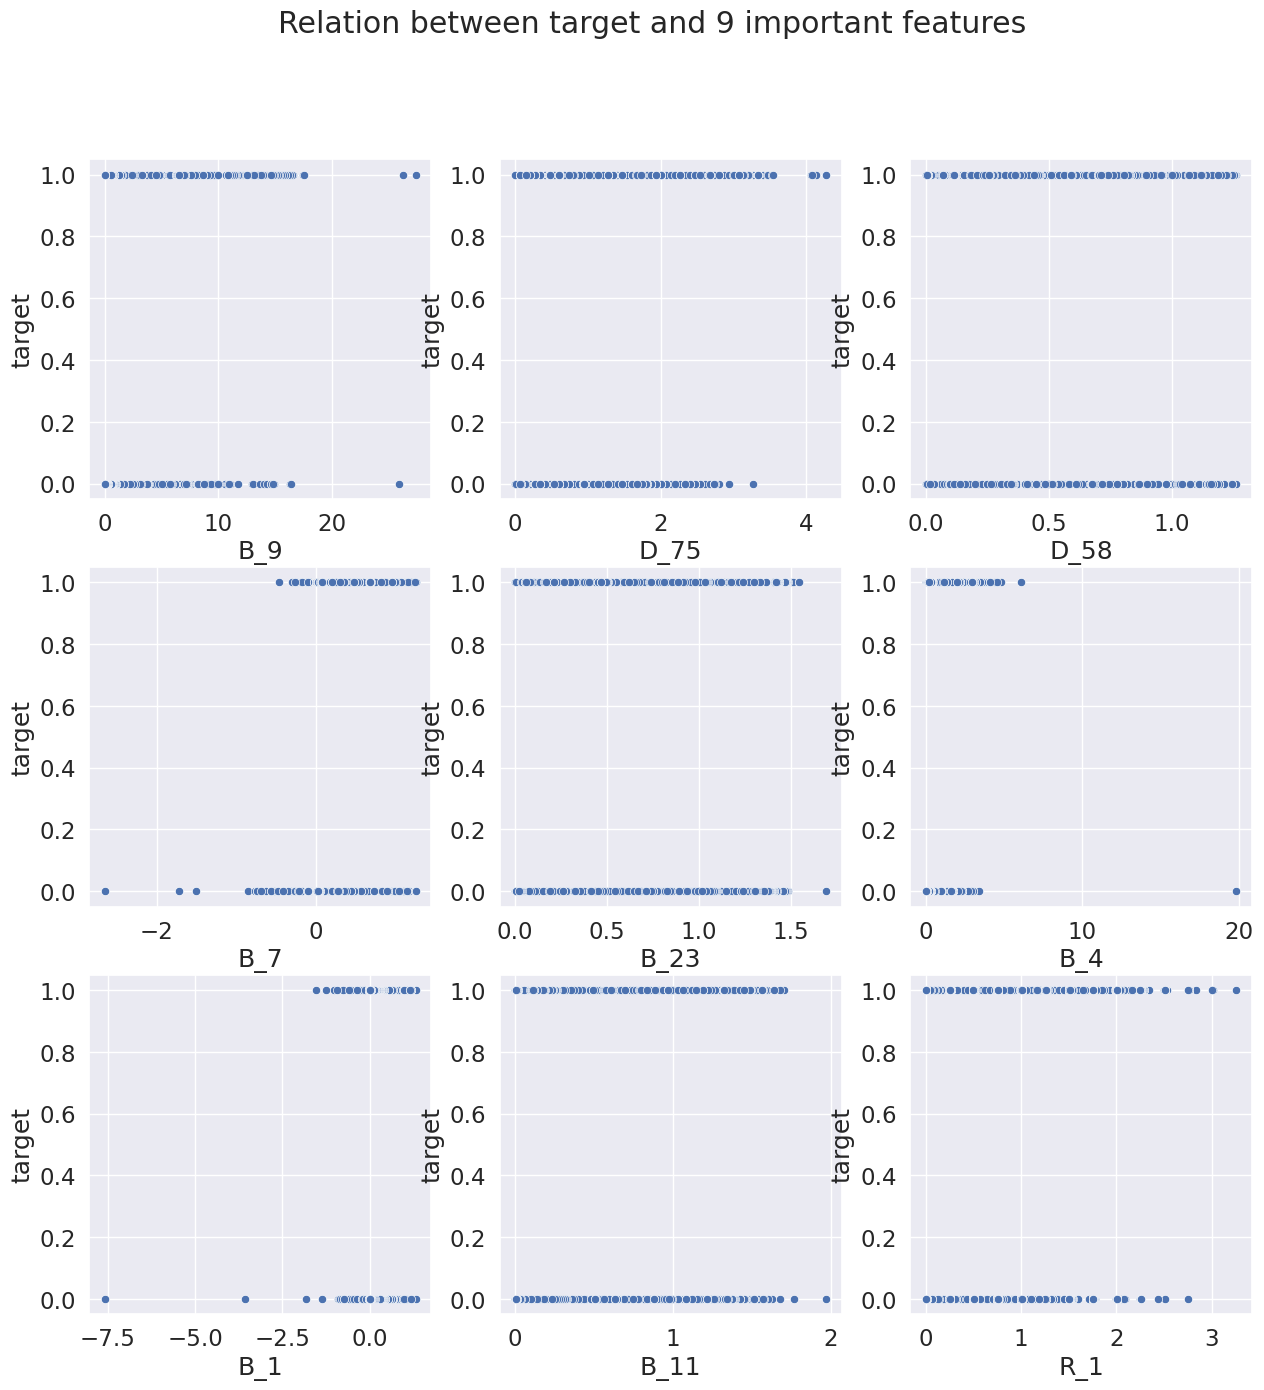

In [26]:
plt.figure(figsize=(15,15))
for i in range(len(cols[:9])):
    plt.subplot(3,3, i+1) #the figure has 3 row, 3 columns, and this plot is the i-th plot.
    sns.scatterplot(x=df_train[cols[i]], y=df_train['target'])
plt.suptitle('Relation between target and 9 important features')

Text(0.5, 0.98, 'Values for nine important features')

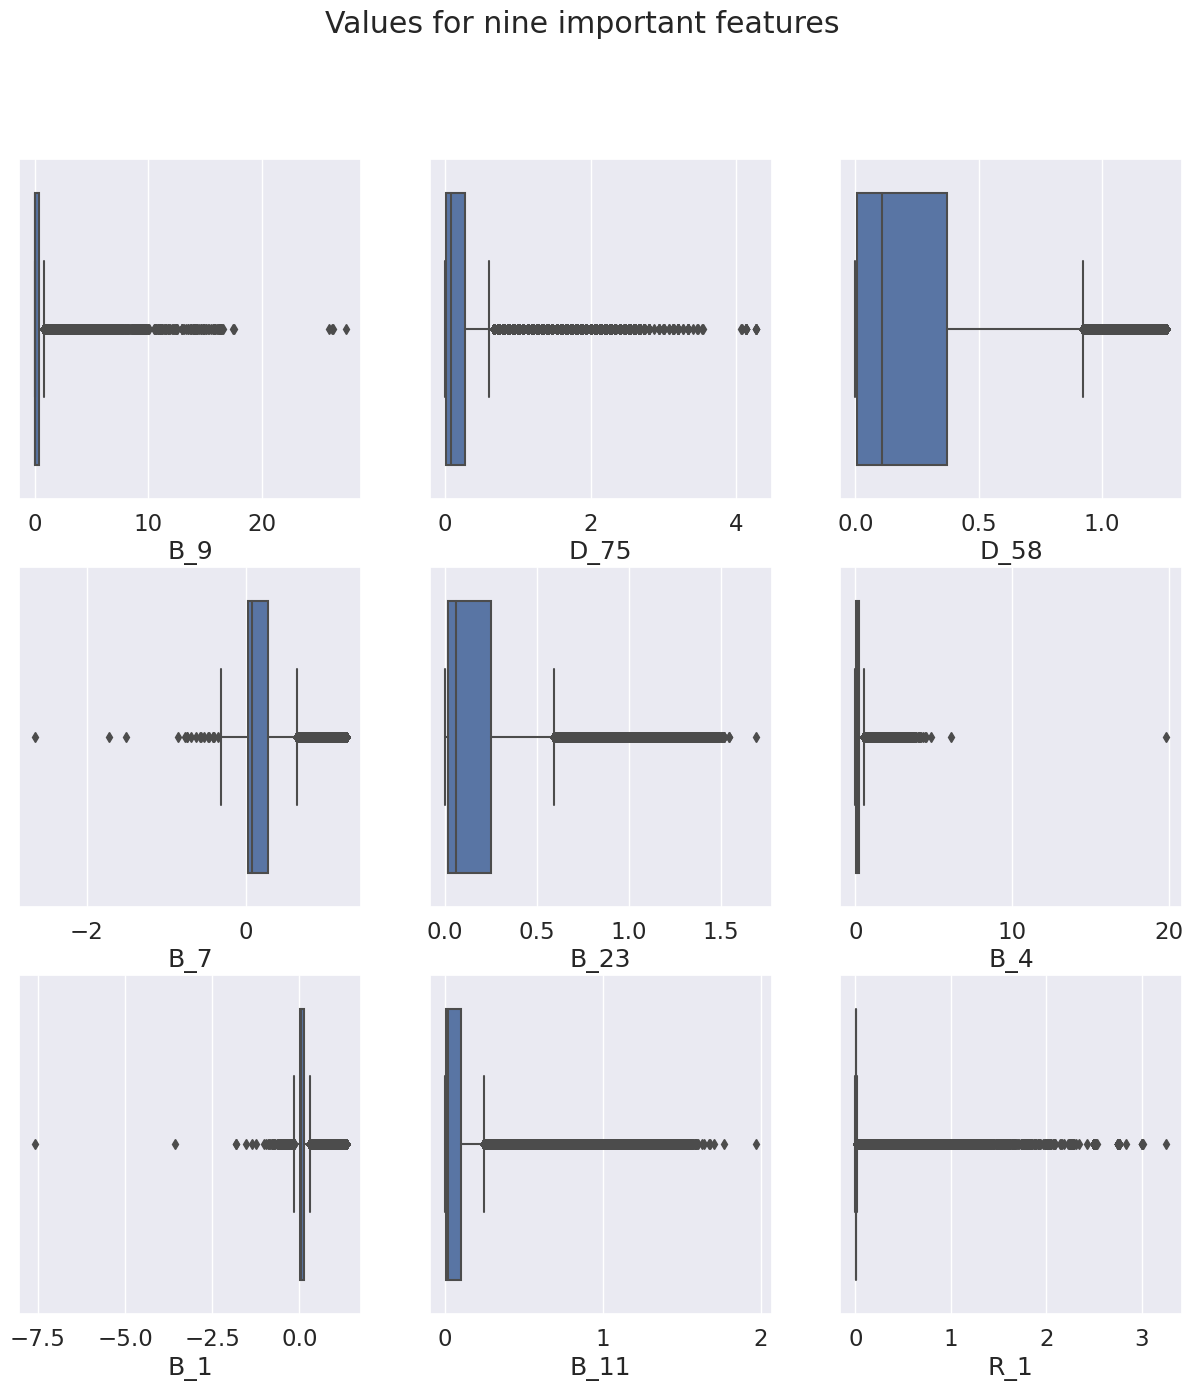

In [27]:
plt.figure(figsize=(15,15))
for i in range(len(cols[:9])):
    plt.subplot(3,3, i+1) #the figure has 3 row, 3 columns, and this plot is the i-th plot.
    sns.boxplot(x=df_train[cols[i]])
plt.suptitle('Values for nine important features')

In [28]:
#print(len(df_train[(df_train['B_9'] > 15)]))
df_train.drop(df_train[(df_train['B_9'] > 15)].index, inplace=True)

In [29]:
#print(len(df_train[(df_train['D_75'] > 3.5)]))
df_train.drop(df_train[(df_train['D_75'] > 3.5)].index, inplace=True)


In [30]:
#print(len(df_train[(df_train['B_7'] < -0.5)]))
df_train.drop(df_train[(df_train['B_7'] < -0.5)].index, inplace=True)

In [31]:
#print(len(df_train[(df_train['B_23'] > 1.5)]))
df_train.drop(df_train[(df_train['B_23'] > 1.5)].index, inplace=True)

In [32]:
#print(len(df_train[(df_train['B_4'] > 4)]))
df_train.drop(df_train[(df_train['B_4'] > 4)].index, inplace=True)

In [33]:
#print(len(df_train[(df_train['B_1'] < -0.5)]))
df_train.drop(df_train[(df_train['B_1'] < -0.5)].index, inplace=True)

In [34]:
#print(len(df_train[(df_train['B_11'] > 1.6)]))
df_train.drop(df_train[(df_train['B_11'] > 1.6)].index, inplace=True)

In [35]:
#print(len(df_train[(df_train['R_1'] > 2.6)]))
df_train.drop(df_train[(df_train['R_1'] > 2.6)].index, inplace=True)

In [36]:
df_majority_0 = df_train[(df_train['target']==0)] 
df_minority_1 = df_train[(df_train['target']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 4153544, 
                                 random_state=44) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

<Axes: xlabel='target', ylabel='count'>

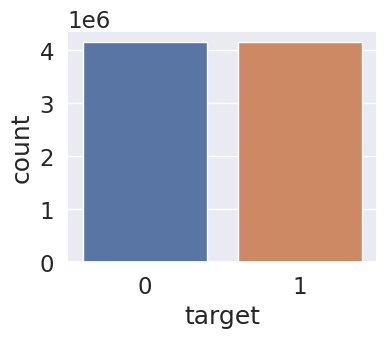

In [37]:
plt.figure(figsize=(4,3))
sns.countplot(x=df_upsampled['target'])


In [ ]:
X = df_upsampled[cols]
y = df_upsampled['target']

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.98, shuffle=True, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5,shuffle=True,random_state=100)